# Python Final Assignment: Group 9

### 0. Analyzing and Pre-Processing the datasets

As first step before starting with exercises, we begin by **analyzing** the datasets provided. 

To archieve this, following code is executed:
- Required modules are imported for data manipulation (`pandas`) and finding files matching a pattern (`glob`). 
- Two variables are defined (`folder_path`, `csv_files`) and a `for` loop is implemented in order to read each of the datasets provided.
- `info.()` method is applied to display the structure and details of each dataset.

The result allow us to have a general idea of the datasets involved, including information on variables or the size and type of data. 

In [1]:
import glob
import pandas as pd

folder_path = r"C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets"
csv_files = glob.glob(f"{folder_path}/*.csv")

for file_path in csv_files:
    data = pd.read_csv(file_path)
    

The pre-processing phase involves many steps. In this case we will focus on handling **missing values** , dropping **duplicates** and dealing with **outliers**.

### 0.1. Checking for missing values

In [2]:
for file_path in csv_files:
    data = pd.read_csv(file_path)
    print(f"Company: {file_path.split('/')[-1]}")
    missing_values = data.isnull().sum()
    print("\nMissing Values:")
    print(missing_values)
    print("-" * 40)

Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A.csv

Missing Values:
Date           0
Open         554
High         543
Low          543
Close        553
Adj Close    551
Volume       561
dtype: int64
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT.csv

Missing Values:
Date          0
Open         38
High         40
Low          40
Close        38
Adj Close    40
Volume       40
dtype: int64
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DPZ.csv

Missing Values:
Date           0
Open         246
High         249
Low          248
Close        254
Adj Close    251
Volume       254
dtype: int64
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\LKNCY.csv

Missing Values:
Date          0
Open         65
High         66
Low          66
Close        65
Adj Close    66

### Plotting the distribution of missing values across the datasets

To check missing values the datasets in a more visual way, we use `seaborn` library for plotting.
**Heatmaps** are used in these case because it displays fairly well the concentration of missing values in each dataset. 

In [3]:
'''import seaborn as sns
import matplotlib.pyplot as plt
for file_path in csv_files:
    data = pd.read_csv(file_path)
    print(f"Company: {file_path.split('/')[-1]}")
    sns.heatmap(data.isnull(), cbar=False)
    plt.show()
    print("-" * 80)'''

'import seaborn as sns\nimport matplotlib.pyplot as plt\nfor file_path in csv_files:\n    data = pd.read_csv(file_path)\n    print(f"Company: {file_path.split(\'/\')[-1]}")\n    sns.heatmap(data.isnull(), cbar=False)\n    plt.show()\n    print("-" * 80)'

### 0.2. Handling the missing values by interplotation, forwardfill and backfill

At this point, we apply 3 techniques to handle missing values: **interplotation**, **forwardfill** and **backfill**.

The following code is executed:
- It iterates over each dataset to apply all 3 techniques by using their respective methods.
- ``interpolate(method='linear')`` fills missing values with linearly interpolated values.
- ``ffill()`` (forward-fill) fills missing values with the previous value in the column.
- ``bfill()`` (backward-fill) fills missing values with the next value in the column.
- Finally, it stores the cleaned dataFrame in the ``data_cleaned`` dictionary using the dataset name as the key.

In [4]:
data_cleaned = {}
for file_path in csv_files: 
    data = pd.read_csv(file_path)
    dataset_name = file_path.split('/')[-1]
    print(f"Pre-processed {dataset_name} for missing values")
    
    data.interpolate(method='linear', inplace=True)
    data.ffill(inplace=True)  
    data.bfill(inplace=True) 
    
    data_cleaned[dataset_name] = data
    
    print("-" * 40)

Pre-processed C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A.csv for missing values
----------------------------------------
Pre-processed C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT.csv for missing values
----------------------------------------
Pre-processed C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DPZ.csv for missing values
----------------------------------------
Pre-processed C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\LKNCY.csv for missing values
----------------------------------------
Pre-processed C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\MCD.csv for missing values
----------------------------------------
Pre-processed C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\PZZA.csv for missing values
----------------------------------------
Pre-processed C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\QSR.csv for missing values
--------------------

C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\4032059013.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\4032059013.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\4032059013.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\4032059013.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and wil

In order to verify the process was executed correctly, we plot again **heatmaps** to visualize if there is any missing values left. 

In [5]:
'''for dataset_name, data in data_cleaned.items():
    print(f"Visualizing cleaned data for: {dataset_name}")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Missing Data Heatmap for {dataset_name} (Cleaned)")
    plt.show()
    
    print(f"Data visualization for {dataset_name} completed.")
    print("-" * 80)'''

'for dataset_name, data in data_cleaned.items():\n    print(f"Visualizing cleaned data for: {dataset_name}")\n    \n    plt.figure(figsize=(10, 6))\n    sns.heatmap(data.isnull(), cbar=False, cmap=\'viridis\')\n    plt.title(f"Missing Data Heatmap for {dataset_name} (Cleaned)")\n    plt.show()\n    \n    print(f"Data visualization for {dataset_name} completed.")\n    print("-" * 80)'

### 0.3. Checking and handling for duplicates 

Now, we found that there are **duplicated rows** in the ``data_cleaned`` dictionary which contains pre-processed DataFrames. 

The following code is executed to check this issue based on the "**Date**" column and removes the second occurrence of each duplicate:
- Iteration over datasets stored in the ``data_cleaned`` dictionary.
- Use of ``data.duplicated(subset='Date').sum()`` to count duplicate rows based on the "Date" column.
- If **duplicates exist**. It removes duplicates using ``drop_duplicates(subset='Date', keep='first')``, keeping the first occurrence of each duplicate. Then it updates the ``data_cleaned`` dictionary with the cleaned dataset and prints a confirmation message.
- If **no duplicates exist**, it prints a message indicating the dataset has no duplicates.

In [6]:
for dataset_name, data in data_cleaned.items():
    print(f"Company: {dataset_name}")
    duplicate_count = data.duplicated(subset='Date').sum()
    print(f"Number of duplicate rows based on 'Date': {duplicate_count}")
    
    if duplicate_count > 0:
        data_cleaned[dataset_name] = data.drop_duplicates(subset='Date', keep='first')
        print(f"Duplicates were removed for {dataset_name}.")
    else:
        print(f"No duplicates found in {dataset_name}.")
    
    print("-" * 40)


Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A.csv
Number of duplicate rows based on 'Date': 5
Duplicates were removed for C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A.csv.
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT.csv
Number of duplicate rows based on 'Date': 5
Duplicates were removed for C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT.csv.
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DPZ.csv
Number of duplicate rows based on 'Date': 5
Duplicates were removed for C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DPZ.csv.
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\LKNCY.csv
Number of duplicate rows based on 'Date': 5
Duplicates were removed for C:\Users\Kevin\Desktop\Python_final\PythonFin

### 0.4. Identifying and handling outliers with interplotation, ffill and bfill

At this phase of data pre-processing process, we need to handle **outliers**.

The following code identifies and handles outliers in numerical columns of pre-processed datasets from ``data_cleaned`` using the **Interquartile Range (IQR) method** and fills the resulting missing values. This method was chosen as it is a widely used technique for detecting outliers because it is *resistant to the influence of extreme values*, unlike methods based on standard deviation or z-scores.

The following code is executed:
- Selects columns with numerical data types (``float64`` and ``int64``).
- Computes IQR for outlier detection. It calculates the 1st quartile (Q1), 3rd quartile (Q3), and IQR (``Q3 - Q1``) for each numerical column.
Then, it defines outliers as values outside ``[Q1 - 3.0 * IQR, Q3 + 3.0 * IQR]``.
- Identifies outlier rows and replaces their values with ``None``.
- Fills missing values (from outliers) using ``interpolate(method='linear')`` for linear interpolation, ``fillna(method='ffill')`` for forward fill and ``fillna(method='bfill')`` for backward fill.
    - We use interpolation first, to maintain a natural stock price trend by estimating missing values based on the surrounding data.
    - After that, we forward fill to in case there are remaining gaps, by using the last known price forward. This suitable for gaps at the
    start of the dataset start or consecutive missing values.
    - Finnaly, we backward fill to complete any remaining gaps by taking future values backward, ensuring that there is no missing data remaining for our datasets.

In [7]:
for dataset_name, data in data_cleaned.items():
    print(f"Outliers for {dataset_name}")
    
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    
    for column in numerical_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # We had to multiply the IQR by 3.0 due to the large number of outliers in the data, and to get the 99.7% range
        lower_bound = Q1 - 3.0 * IQR #2.695 or 2.7
        upper_bound = Q3 + 3.0 * IQR #2.695 or 2.7
        
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        outlier_count = outliers.sum()
        print(f"'{column}': {outlier_count} outliers ")
        data.loc[outliers, column] = None
    

    data.interpolate(method='linear', inplace=True)
    data.fillna(method='ffill', inplace=True)
    data.fillna(method='bfill', inplace=True)
    
    print(f"Outliers were handled for {dataset_name}.")
    print("-" * 40)


Outliers for C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A.csv
'Open': 287 outliers 
'High': 291 outliers 
'Low': 287 outliers 
'Close': 286 outliers 
'Adj Close': 288 outliers 
'Volume': 192 outliers 
Outliers were handled for C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A.csv.
----------------------------------------
Outliers for C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT.csv
'Open': 24 outliers 
'High': 22 outliers 
'Low': 20 outliers 
'Close': 23 outliers 
'Adj Close': 20 outliers 
'Volume': 29 outliers 
Outliers were handled for C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT.csv.
----------------------------------------
Outliers for C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DPZ.csv
'Open': 128 outliers 
'High': 128 outliers 
'Low': 127 outliers 
'Close': 127 outliers 
'Adj Close': 127 outliers 
'Volume': 122 outliers 
Outliers were handled for C:\Users\Kevin\Desktop\Pyth

C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\2614095281.py:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\2614095281.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\2614095281.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\2614095281.py:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before inter

Now that we have completed the necessary pre-prcoessing steps for the dataset we can continue with the exercises

## Exercises for final assignment and presentation

### Exercise 1:
For each dataset:
- Print the number of rows and columns
- Display the column names and their data types

In [8]:
for dataset_name, data in data_cleaned.items():
    print(f"Dataset: {dataset_name.split('.')[-2]}") 
    print(f"Number of rows: {data.shape[0]} \nNumber of columns: {data.shape[1]}")
    print("Columns and Data Types:")
    print(data.dtypes)
    print("-" * 40)

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A
Number of rows: 11222 
Number of columns: 7
Columns and Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
----------------------------------------
Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT
Number of rows: 810 
Number of columns: 7
Columns and Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
----------------------------------------
Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DPZ
Number of rows: 5083 
Number of columns: 7
Columns and Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object
---

### Exercise 2:
- Extract all rows where the date is in the year 2023. Print the number of rows and visualize the Close price trend for this period.

#### Note: For exercise two, the outlier removal was successful for every graph, except for the two outliers in SBUX. Due to the nature of these extreme outliers, the following outliers remained: one on 2023-02-09 with a closing price of 304.82 and another on 2023-10-12 with a closing price of 304.82. These outliers could only have been resolved by lowering the threshold, which is multiplied by the IQR. However, doing so would have other graphs, such as MCD, to be imputed incorrectly due to a important portion of its dataset then being missing. A balancing value between 2.5 and 3 for the threshold does not exist. Therefore, we chose to accept the two outliers in SBUX. The removal could only have been done manually, not within the for-loop.

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A
Number of rows for 2023: 250


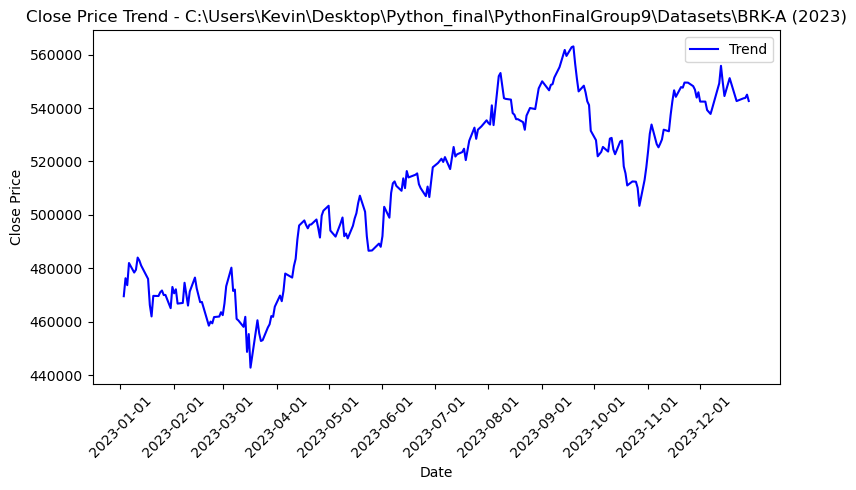

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT
Number of rows for 2023: 250


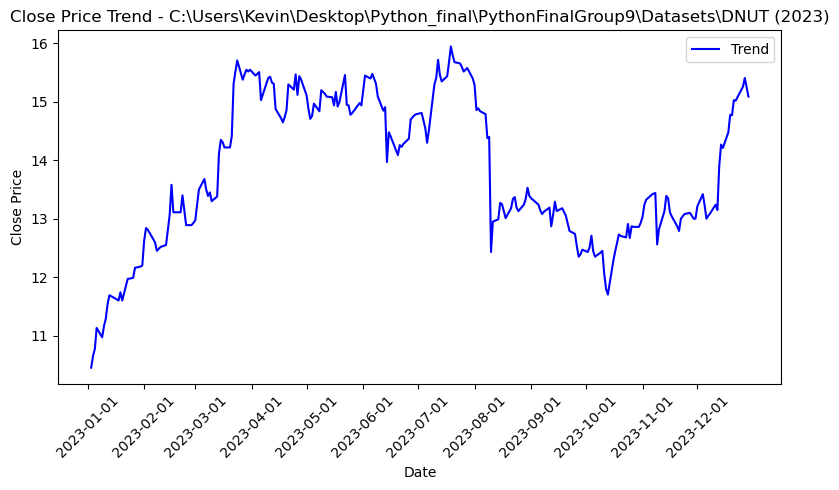

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DPZ
Number of rows for 2023: 250


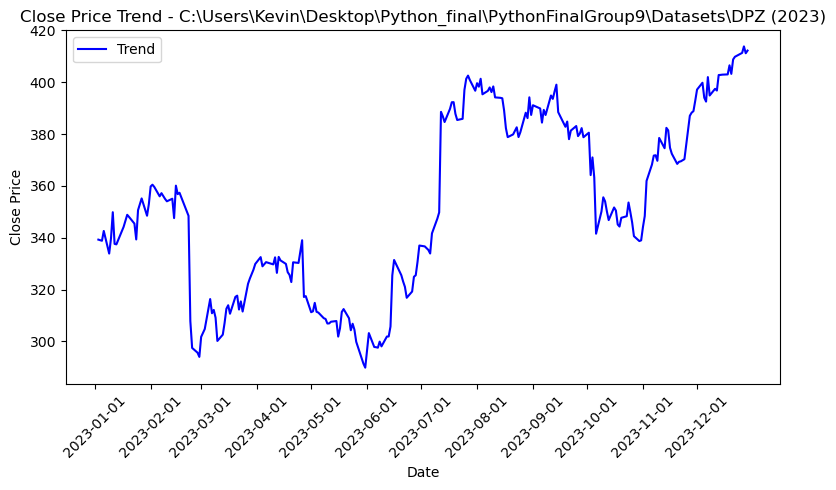

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\LKNCY
Number of rows for 2023: 250


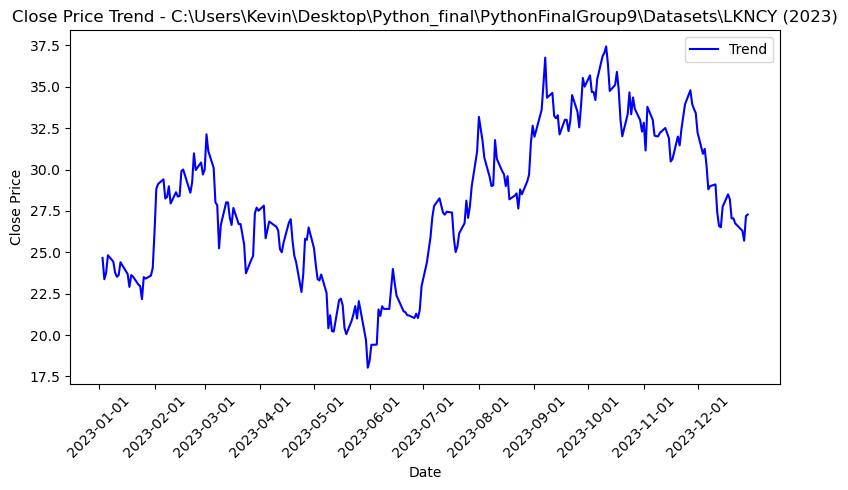

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\MCD
Number of rows for 2023: 250


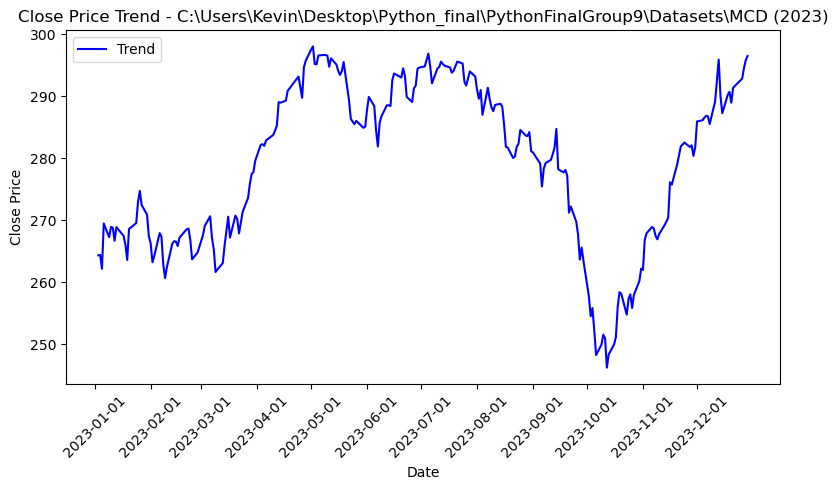

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\PZZA
Number of rows for 2023: 250


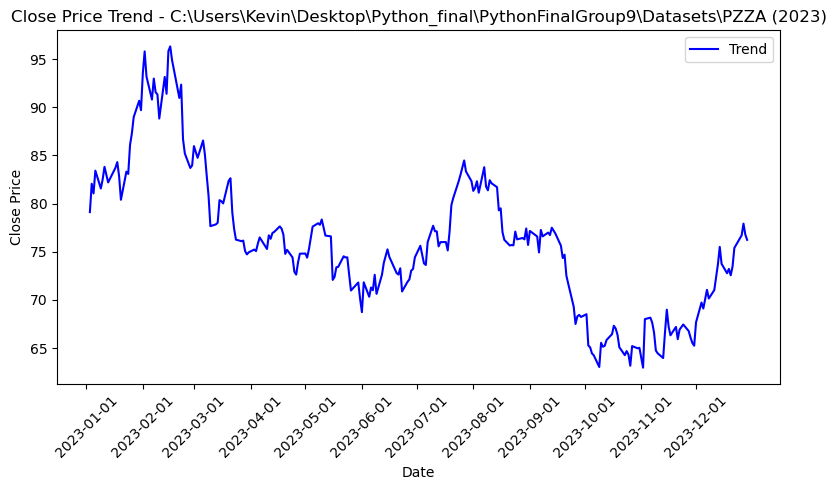

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\QSR
Number of rows for 2023: 250


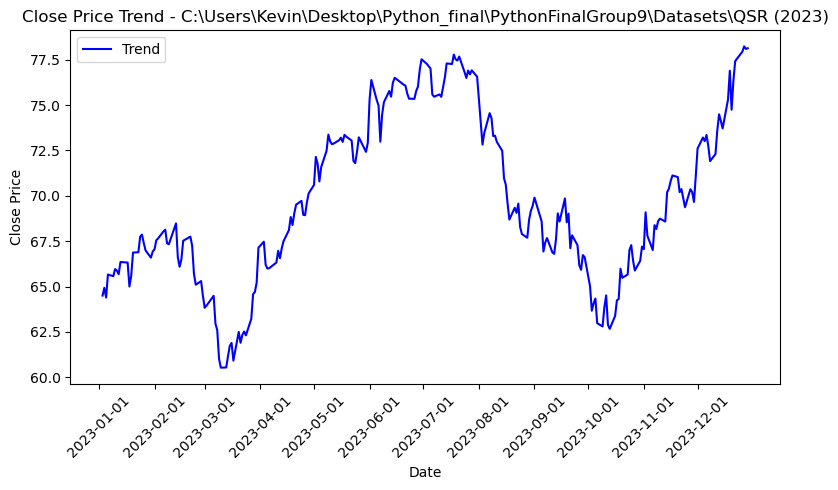

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\SBUX
Number of rows for 2023: 250


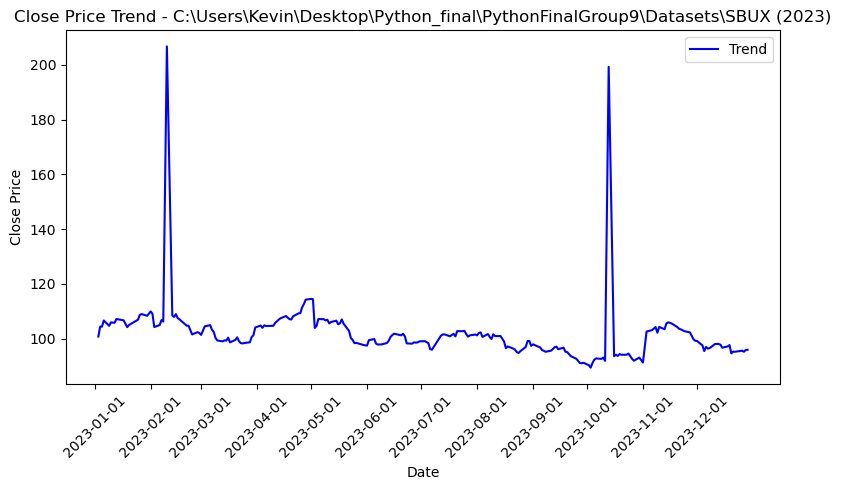

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\WEN
Number of rows for 2023: 250


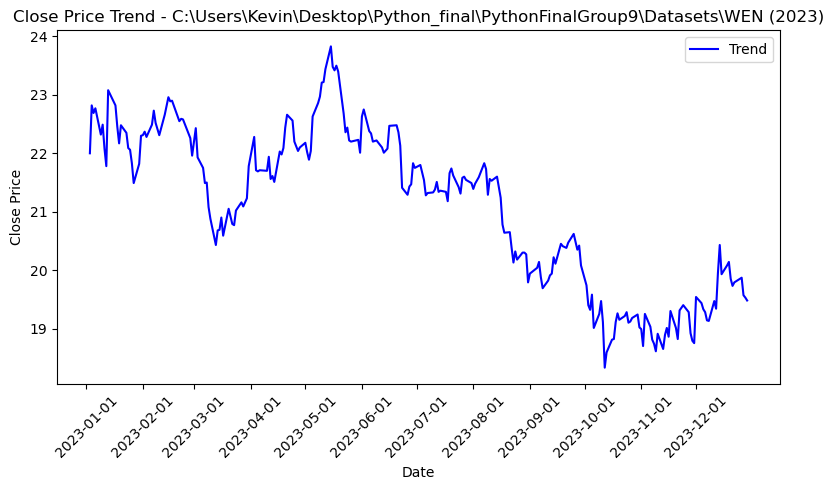

Dataset: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\YUM
Number of rows for 2023: 250


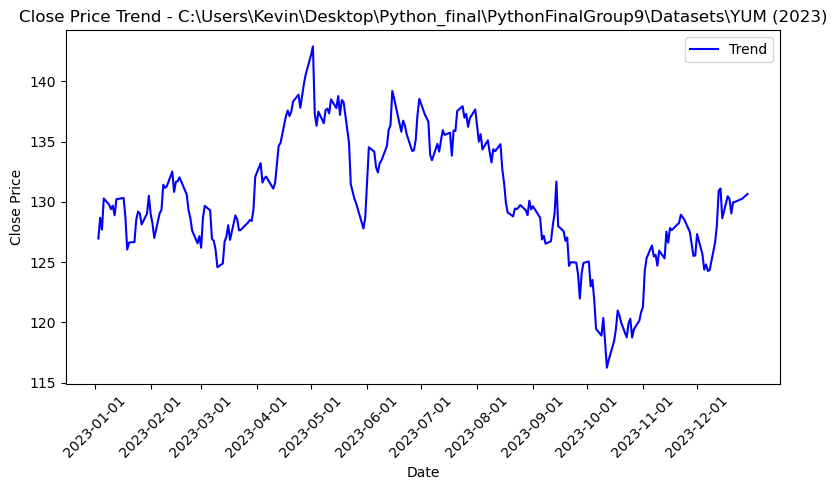

In [9]:
import matplotlib.pyplot as plt
import datetime as dt
for dataset_name, data in data_cleaned.items():
    
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data_2023 = data[data['Date'].dt.year == 2023]
    
    print(f"Dataset: {dataset_name.split('.')[-2]}")
    print(f"Number of rows for 2023: {data_2023.shape[0]}")
    name = dataset_name.split('.')[0]

    plt.figure(figsize=(8, 5))
    plt.plot(data_2023['Date'], data_2023['Close'], label=f"Trend" , color='blue')
    plt.title(f"Close Price Trend - {name} (2023)")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(pd.date_range(start="2023-01-01", end="2023-12-31", freq='MS'),rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Exercise 3:
- For each company, find the day with the highest Close price and display it alongside the price.

In [10]:
for dataset_name, data in data_cleaned.items():
   
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    max_close_row = data.loc[data['Close'].idxmax()]
    
    highest_close_date = max_close_row['Date'].date()
    highest_close_price = max_close_row['Close']
    
    print(f"Company: {dataset_name}")
    print(f"Date with highest Close price: {highest_close_date}")
    print(f"Highest Close price: {highest_close_price:.2f}")
    print("-" * 40)

Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\BRK-A.csv
Date with highest Close price: 2024-09-03
Highest Close price: 715910.00
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DNUT.csv
Date with highest Close price: 2021-07-01
Highest Close price: 21.00
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\DPZ.csv
Date with highest Close price: 2008-07-14
Highest Close price: 1048.66
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\LKNCY.csv
Date with highest Close price: 2020-01-17
Highest Close price: 50.02
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python_final\PythonFinalGroup9\Datasets\MCD.csv
Date with highest Close price: 2013-05-13
Highest Close price: 304.08
----------------------------------------
Company: C:\Users\Kevin\Desktop\Python

### Exercise 4:
- Group the data by month and calculate the average Close price for each company. Plot these monthly
averages for 3 companies and compare them. Justify the chart selection.

#### Justification

In this case, the **line chart** is the ideal choice for this time-series data due to the following reasons: 
- It **enhances visualization for temporal trends**. Time-series data, such as average close prices over months or years, is best represented with a line chart because it allows for a continuous and intuitive understanding of how values evolve over time.
- Clear **comparison between companies**. The line chart enables the comparison of multiple companies simultaneously, with each company represented by a distinct line. This helps highlight relative performances, such as which companies experience consistent growth, fluctuations, or stagnation.
- Ideal for **large timeframes**. Line charts effectively manage long time periods, such as decades of data, by presenting a compact and coherent visual that allow users to observe both long-term trends and short-term variations without being overwhelmed.
- Highlighting **growth and volatility**. The chart clearly shows periods of rapid growth, decline, or volatility in the average close prices. For example, steep slopes indicate growth spurts, while flat lines reflect stability.

C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\3092237034.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.to_period('M')
C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\3092237034.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.to_period('M')
C:\Users\Kevin\AppData\Local\Temp\ipykernel_1904\3092237034.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

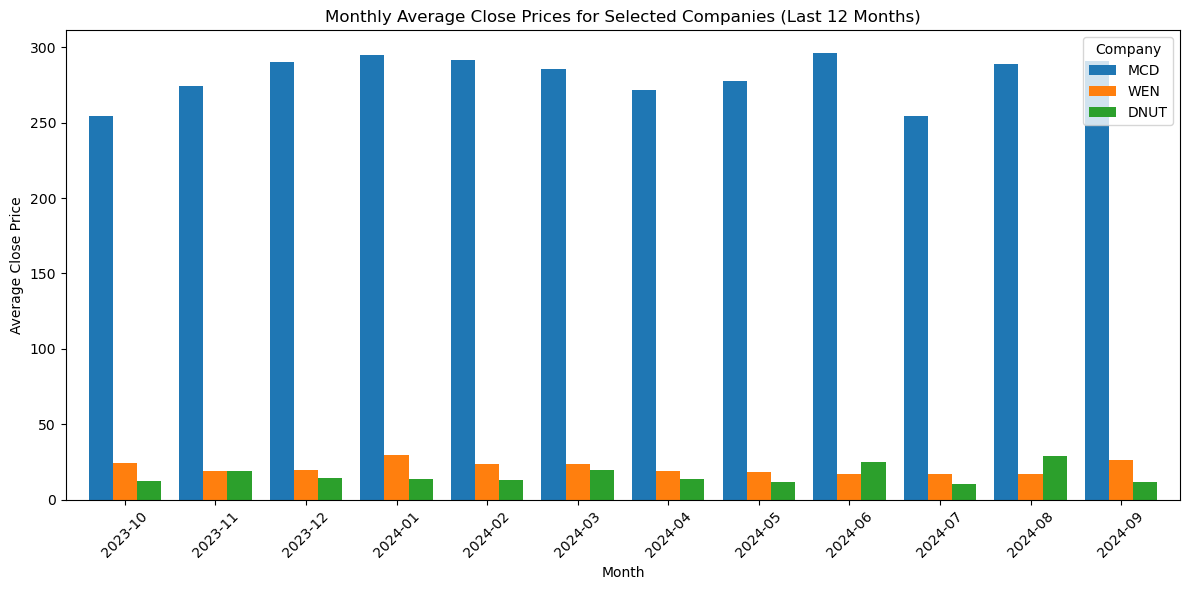

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os


datasets = {}
for file_path in csv_files:
    name = os.path.basename(file_path).split('.')[0]  
    datasets[name] = pd.read_csv(file_path)
    
    if 'Date' in datasets[name].columns:
        datasets[name]['Date'] = pd.to_datetime(datasets[name]['Date'], errors='coerce')
    else:
        print(f"'Date' column missing in dataset for {name}. Skipping.")
        continue

selected_companies = ['MCD', 'WEN', 'DNUT']
monthly_averages = {}

for name in selected_companies:
 
    if name not in datasets:
        print(f"Dataset for {name} not found. Skipping.")
        continue
    
    df = datasets[name]
    
    if 'Date' not in df.columns or 'Close' not in df.columns:
        print(f"'Date' or 'Close' column missing in dataset for {name}. Skipping.")
        continue
    
    df = df.dropna(subset=['Date', 'Close'])
   
    df['Month'] = df['Date'].dt.to_period('M') 
    monthly_avg = df.groupby('Month')['Close'].mean().tail(12)  
    monthly_averages[name] = monthly_avg

monthly_avg_df = pd.DataFrame(monthly_averages)

fig, ax = plt.subplots(figsize=(12, 6))

monthly_avg_df.plot(kind='bar', ax=ax, width=0.8)  
ax.set_title("Monthly Average Close Prices for Selected Companies (Last 12 Months)")
ax.set_xlabel("Month")
ax.set_ylabel("Average Close Price")

plt.xticks(rotation=45)

plt.legend(title="Company")

plt.tight_layout()
plt.show()
